In [7]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data= pd.read_csv('textfile.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
data.shape # it is used to return the no. of rows and columns in the dataset

(25, 2)

In [11]:
data.info()  #it is used to check if dataset contains any null values and check about data types  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot: xlabel='Hours', ylabel='Scores'>

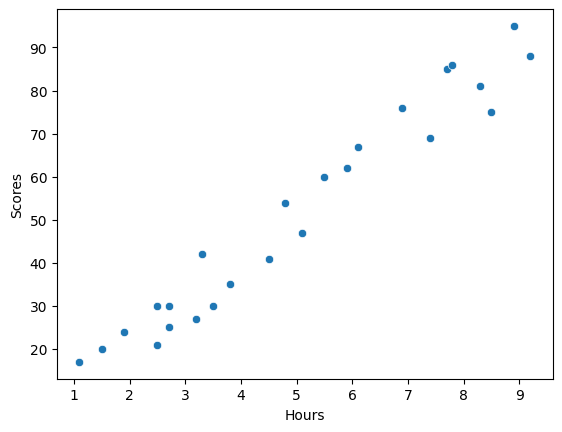

In [13]:
sns.scatterplot(x=data['Hours'], y= data['Scores']) #plotting of data

<AxesSubplot: xlabel='Hours', ylabel='Scores'>

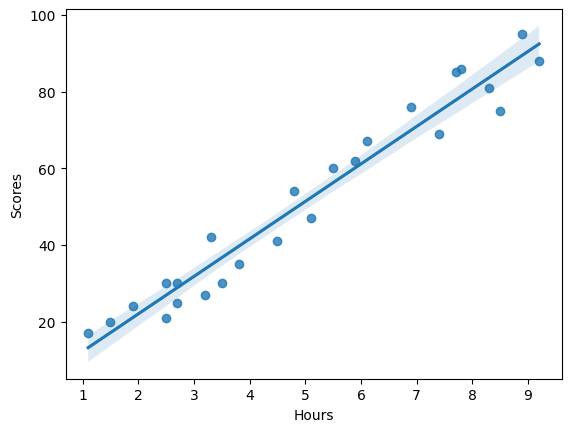

In [14]:
sns.regplot(x=data['Hours'], y= data['Scores']) #regression plot giving better view of data

In [15]:
x= data[['Hours']]
y= data['Scores']


In [21]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(x,y, random_state = 0)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [24]:
regressor.fit(train_X, train_y) # to train the model

LinearRegression()

In [25]:
pred_y = regressor.predict(val_X) #predicted values

In [26]:
pd.DataFrame({'Actual': val_y, 'Predicted': pred_y}) #views actual and predicted values

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


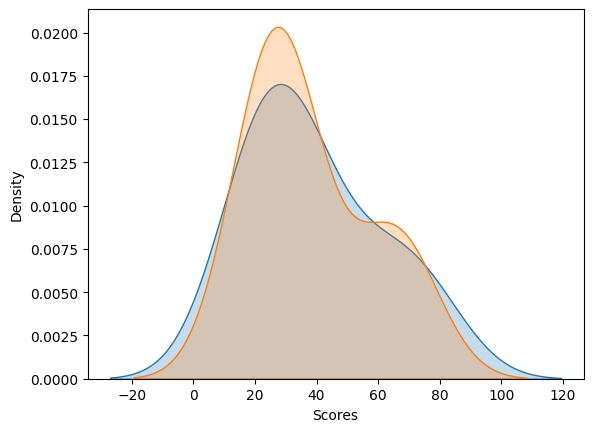

In [29]:
#graphical representation of Actual and Predicted values

sns.kdeplot(pred_y, label="Predicted", shade = True)
sns.kdeplot(data = val_y, label="Actual", shade = True)


In [30]:
print('Train accuracy: ', regressor.score(train_X, train_y), '\nTest accuracy : ', regressor.score(val_X , val_y) )

Train accuracy:  0.9484509249326872 
Test accuracy :  0.9367661043365055


In [32]:
#Predicting percentage for custom input value for hours
# GIVEN PROBLEM : What will be the predicted score if a student studies for 9.25 hrs/day?

h= [[9.25]]
s= regressor.predict(h)
print('A student who studies ', h[0][0], 'hours is estimated to score ', s[0])

A student who studies  9.25 hours is estimated to score  93.89272889341655
